In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Snippet for the use of relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

from sklearn.model_selection import train_test_split

from src.data.make_dataset import X_raw, Y
from src.visualization.visualize import plot_model_results

In [5]:
seed = 42
np.random.seed(seed)
rnd.seed(seed)

# Deep Learning (part.2)

## Convolutional Neural Networks

### Preprocessing

We basically split the data into train and validation sets, then we can normalize to fit the interval \[0, 1\]

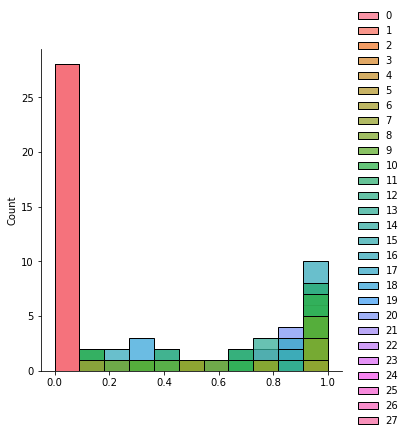

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, Y, test_size=0.2, shuffle=True, random_state=seed)
# Preprocessing
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

sns.displot(np.array(X_train)[0])

In [7]:
# Expand the dimensions of the images to feed the CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

(TensorShape([56000, 28, 28, 1]), TensorShape([14000, 28, 28, 1]))

### Single Convolutional Block Network

In [11]:
model = models.Sequential()

# CONV layer w/ 8 Filters of size (2 ,2) / Stride of 1 / Padding that keeps input size / Activation RELU -> Common values
model.add(layers.Conv2D(8, (2, 2), input_shape=(28, 28, 1), activation='relu', padding='same')) 
# POOL layer w/ Spatial Extent of 2 / Strides of 2 -> Common values
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten the tensor to feed the FC Layers
model.add(layers.Flatten())
# FC layer w/ 
model.add(layers.Dense(15))
# Output layer w/ 10 classes
model.add(layers.Dense(10))


In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                23535     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
Total params: 23,735
Trainable params: 23,735
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
n_epochs = 20
batch_size = 32

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Train on 56000 samples, validate on 14000 samples
Epoch 1/20
18464/56000 [========>.....................] - ETA: 28s - loss: 0.6031 - accuracy: 0.8274

KeyboardInterrupt: 

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.3f}')

14000/1 - 2s - loss: 0.3408 - accuracy: 0.9752
Test accuracy : 0.975


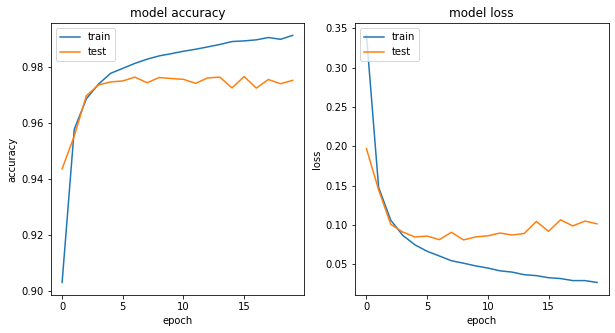

In [28]:
plot_model_results(history)

### Fine tuning the basic model 

We basically add more filters as we can clearly see that 8 is not enough, we also boost their size to make the features extracted a little bit more relevant
We forgot the softmax activation on the last layer which is important as it is a multiclass classification problem

In [7]:
model = models.Sequential()

# CONV layer w/ 24 Filters of size (5 ,5) / Stride of 1 / Padding that keeps input size / Activation RELU 
model.add(layers.Conv2D(24, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same')) 
# POOL layer w/ Spatial Extent of 2 / Strides of 2 -> Common values
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten the tensor to feed the FC Layers
model.add(layers.Flatten())
# FC layer w/ 30 hidden units
model.add(layers.Dense(30, activation='relu'))
# Output layer w/ 10 classes and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
n_epochs = 20
batch_size = 32

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 31s 554us/sample - loss: 1.6217 - accuracy: 0.8459 - val_loss: 1.5858 - val_accuracy: 0.8776
Epoch 2/20
56000/56000 [==============================] - 28s 494us/sample - loss: 1.5257 - accuracy: 0.9380 - val_loss: 1.4891 - val_accuracy: 0.9749
Epoch 3/20
56000/56000 [==============================] - 28s 500us/sample - loss: 1.4850 - accuracy: 0.9781 - val_loss: 1.4841 - val_accuracy: 0.9794
Epoch 4/20
56000/56000 [==============================] - 35s 620us/sample - loss: 1.4796 - accuracy: 0.9827 - val_loss: 1.4820 - val_accuracy: 0.9807
Epoch 5/20
56000/56000 [==============================] - 37s 660us/sample - loss: 1.4768 - accuracy: 0.9850 - val_loss: 1.4793 - val_accuracy: 0.9829
Epoch 6/20
56000/56000 [==============================] - 42s 745us/sample - loss: 1.4747 - accuracy: 0.9871 - val_loss: 1.4782 - val_accuracy: 0.9833
Epoch 7/20
56000/56000 [====================

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.3f}')

14000/1 - 2s - loss: 1.4680 - accuracy: 0.9866
Test accuracy : 0.987


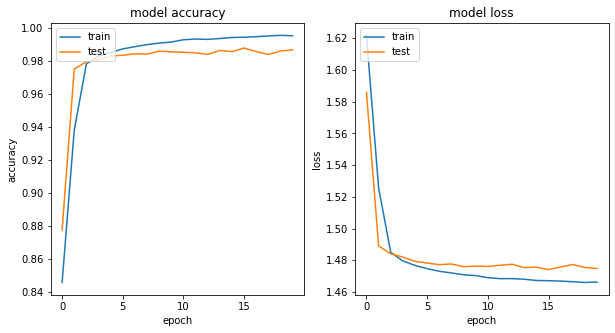

In [11]:
plot_model_results(history)

Training visualization

In [15]:
filters, biases = model.layers[0].get_weights()

In [16]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters - f_min) / (f_max - f_min)

In [17]:
filters_norm.min(), filters_norm.max()

(0.0, 1.0)

In [18]:
filters_norm.shape

(5, 5, 1, 24)

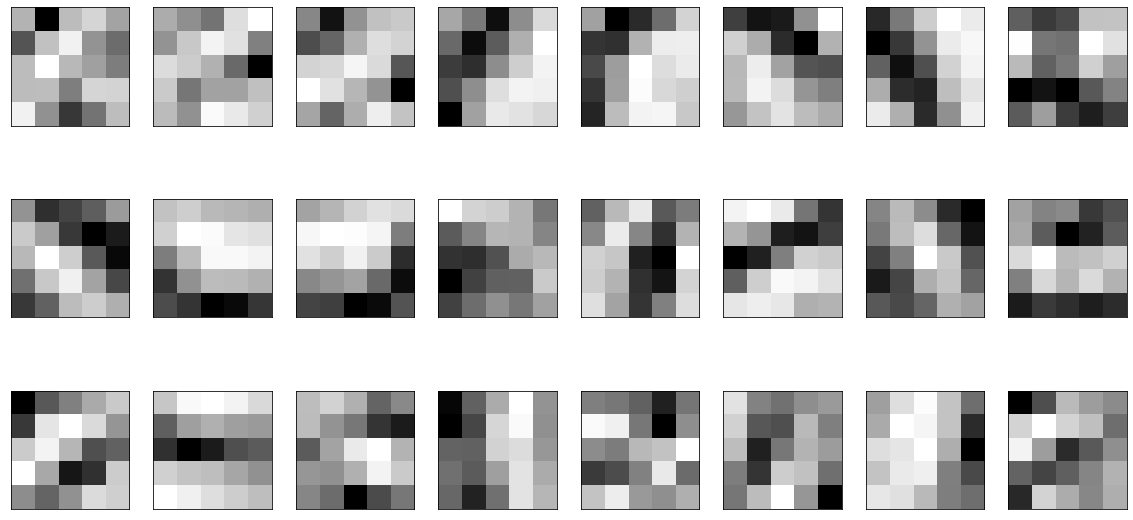

In [23]:
n_filters = 24
fig, ax = plt.subplots(3, 8, figsize=(20, 10))
for filter_index, axi in enumerate(ax.flat):
    filter = filters_norm[:, :, 0, filter_index]
    axi.set(xticks=[], yticks=[])
    axi.imshow(filter, interpolation="nearest", cmap=plt.cm.gray)

In [24]:
# Define a new model that will just apply the first CONV layer
model_conv = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

([], [])

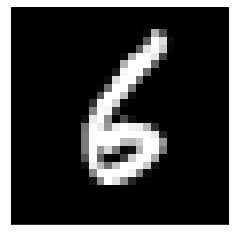

In [32]:
plt.imshow(X_test[3], cmap='gray')
plt.xticks([])
plt.yticks([])

In [43]:
test_img = np.expand_dims(X_test[3], axis=0)
activation_maps = model_conv.predict(test_img)

0.0

In [38]:
activation_maps.shape

(1, 28, 28, 24)

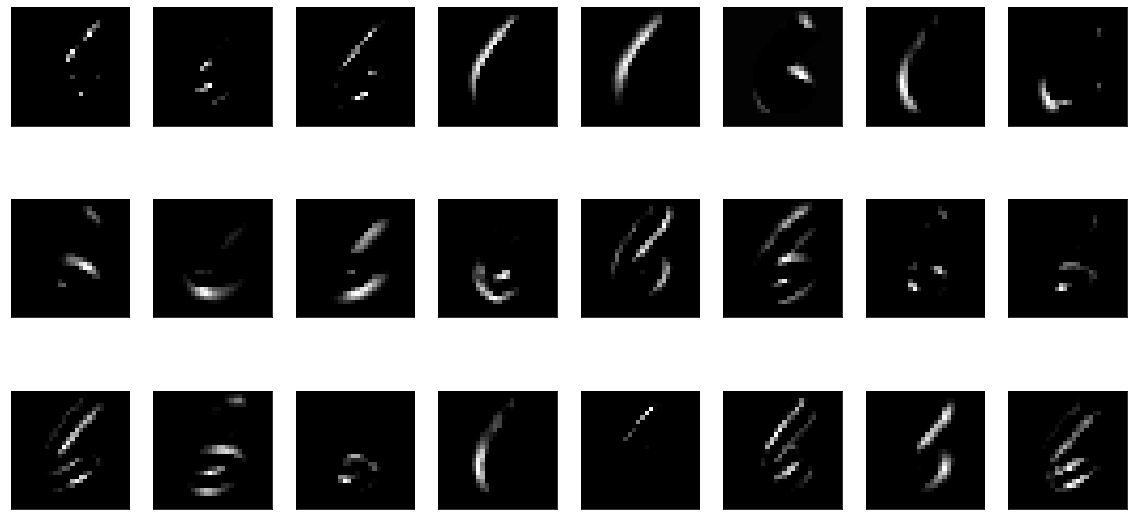

In [45]:
n_filters = 24
fig, ax = plt.subplots(3, 8, figsize=(20, 10))
for index, axi in enumerate(ax.flat):
    activation_map = activation_maps[0, :, :, index]
    axi.set(xticks=[], yticks=[])
    axi.imshow(activation_map, cmap=plt.cm.gray)

### Testing a few architectures and compare them

For the FC layer we know that we do not want too many neurons or our model may overfit, 
64 will be sufficient for tweaking the CONV block parameters.

We first have to decide how many convolutional blocks are necessary ? 1, 2 or 3
It is a common practice to add more filters as we add more convolutional blocks

Then, we should pick the number of filters that lead to the best results. 

Finally, we can see how the number of neurons in the the last FC layer impacts the model.

In [8]:
# Convert the labels to categorical type
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
def build_model(n_conv_blocks, kernel_size=5, n_hidden_units=64, dropout=None, filters_array=None):
    """
    Function that builds a CNN with a fixed amount of convolutional blocks
    The number of filters increases at each activation map by a power of 2 starting at 2^4=16
    The kernel size is set to 5x5 but can be changed
    The final FC layer has 64 hidden units but this can also be modified
    args: 
        {n_conv_blocks} : number of convolutional blocks we want the CNN to have
        {kernel_size} : the kernel size used in each CONV layer
        {n_hidden_units} : number of hidden units of the unique FC layer
        {dropout} : dropout factor, adds dropout layers if given
    """

    assert len(filters_array) == n_conv_blocks, "There should be one filters' number for each convolutional block"

    model = models.Sequential() 

    filters = filters_array if filters_array else [16 * (i + 1) for i in range(n_conv_blocks)]

    for idx_conv_block in range(n_conv_blocks):
        n_filters = filters[idx_conv_block]
        # Add a CONV layer
        model.add(layers.Conv2D(n_filters, kernel_size=kernel_size, padding='same', activation='relu', input_shape=(28, 28, 1)))
        # Add the associated POOL layer
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Add a Dropout layer for regularization
        if dropout:
            model.add(layers.Dropout(dropout))
        # Update the number of filters
    
    # Flatten the data
    model.add(layers.Flatten())
    # FC layer w/ {n_hidden_units} hidden units
    model.add(layers.Dense(n_hidden_units, activation='relu'))
    # Output layer w/ 10 classes and softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [34]:
n_blocks = [1, 2, 3]

n_epochs = 30
batch_size = 128

histories = []

for n_block in n_blocks:
    model_ = build_model(n_block)
    history_ = model_.fit(X_train, y_train_cat, epochs=n_epochs, validation_data=(X_test, y_test_cat))
    histories.append(history_)

Train on 56000 samples, validate on 14000 samples
Epoch 1/30
56000/56000 [==============================] - 26s 471us/sample - loss: 0.1827 - accuracy: 0.9459 - val_loss: 0.0773 - val_accuracy: 0.9776
Epoch 2/30
56000/56000 [==============================] - 26s 461us/sample - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0570 - val_accuracy: 0.9834
Epoch 3/30
56000/56000 [==============================] - 25s 449us/sample - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 4/30
56000/56000 [==============================] - 26s 465us/sample - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0581 - val_accuracy: 0.9841
Epoch 5/30
56000/56000 [==============================] - 26s 458us/sample - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 6/30
56000/56000 [==============================] - 26s 461us/sample - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.0662 - val_accuracy: 0.9814
Epoch 7/30
56000/56000 [====================

TypeError: unsupported format string passed to list.__format__

CNN 0: Epochs=30, Train accuracy=0.99911, Validation accuracy=0.98629
CNN 1: Epochs=30, Train accuracy=0.99921, Validation accuracy=0.98950
CNN 2: Epochs=30, Train accuracy=0.99846, Validation accuracy=0.99093


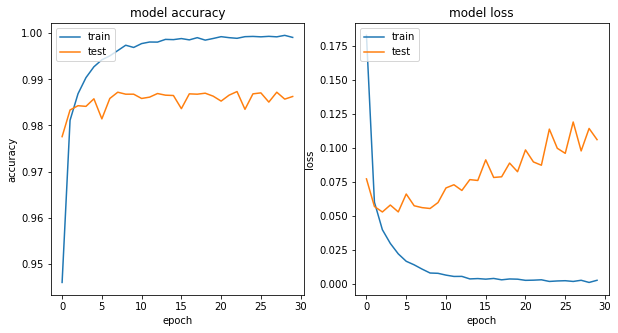

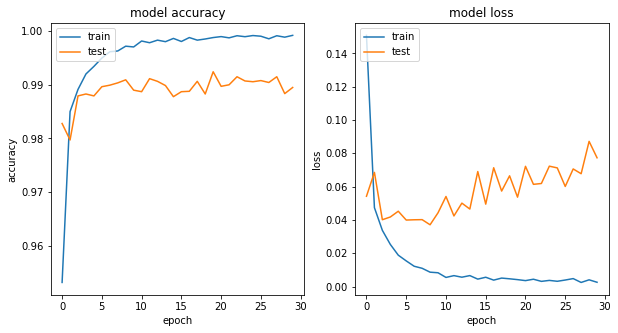

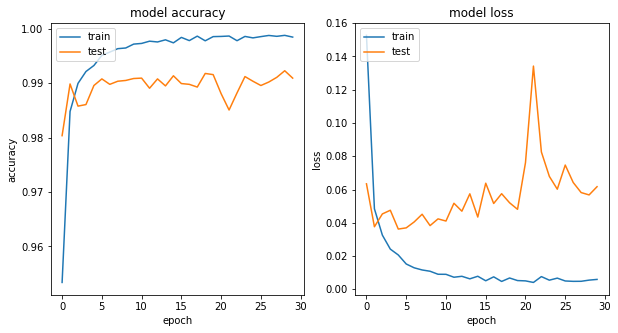

In [36]:
for i, hist in enumerate(histories):
    print(f"CNN {i}: Epochs={n_epochs}, Train accuracy={hist.history['accuracy'][-1]:.5f}, Validation accuracy={hist.history['val_accuracy'][-1]:.5f}")
    plot_model_results(hist)

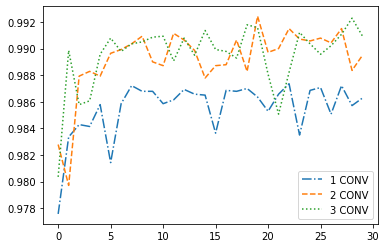

In [42]:
linestyles = ['-.', '--', ':']

for i, hist in enumerate(histories):
    plt.plot(hist.history['val_accuracy'], linestyle=linestyles[i])

plt.legend(['1 CONV', '2 CONV', '3 CONV'],loc='best')

We pick 2 CONV blocks

Now figuring out the optimum number of filters, we can try out the 6 following combinations :
- 8 -- 16
- 16 -- 32
- 32 -- 64
- 24 -- 48
- 48 -- 96
- 12 -- 36

In [18]:
n_filters = [
    # [8, 16],
    # [32, 64],
    # [12, 36],
    [24, 48],
]

# histories = []

n_epochs = 20
batch_size = 128

for n_filter in n_filters:
    model = build_model(2, filters_array=n_filter, dropout=0.4)
    # model.summary()
    history = model.fit(X_train, y_train_cat, epochs=n_epochs, validation_data=(X_test, y_test_cat), batch_size=batch_size)
    histories.append(history)


Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 79s 1ms/sample - loss: 0.2905 - accuracy: 0.9094 - val_loss: 0.0813 - val_accuracy: 0.9749
Epoch 2/20
56000/56000 [==============================] - 76s 1ms/sample - loss: 0.0880 - accuracy: 0.9717 - val_loss: 0.0529 - val_accuracy: 0.9847
Epoch 3/20
56000/56000 [==============================] - 83s 1ms/sample - loss: 0.0671 - accuracy: 0.9787 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 4/20
56000/56000 [==============================] - 82s 1ms/sample - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0397 - val_accuracy: 0.9886
Epoch 5/20
56000/56000 [==============================] - 81s 1ms/sample - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0339 - val_accuracy: 0.9901
Epoch 6/20
56000/56000 [==============================] - 81s 1ms/sample - loss: 0.0420 - accuracy: 0.9860 - val_loss: 0.0372 - val_accuracy: 0.9882
Epoch 7/20
56000/56000 [==============================] 

CNN 0: Epochs=20, Train accuracy=0.98541, Validation accuracy=0.99107
CNN 1: Epochs=20, Train accuracy=0.99532, Validation accuracy=0.99264
CNN 2: Epochs=20, Train accuracy=0.99100, Validation accuracy=0.99243
CNN 3: Epochs=20, Train accuracy=0.99380, Validation accuracy=0.99264


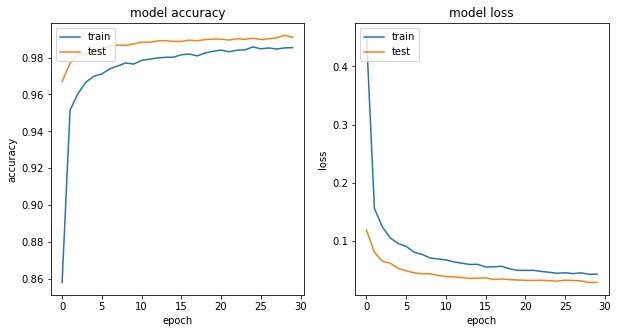

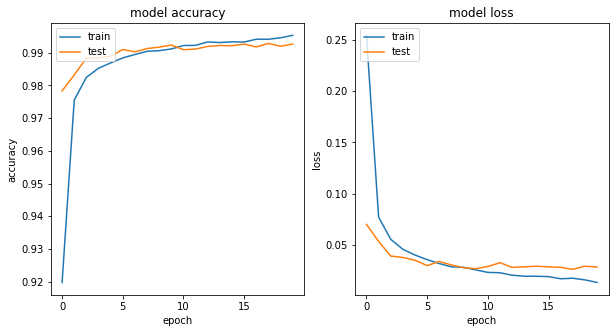

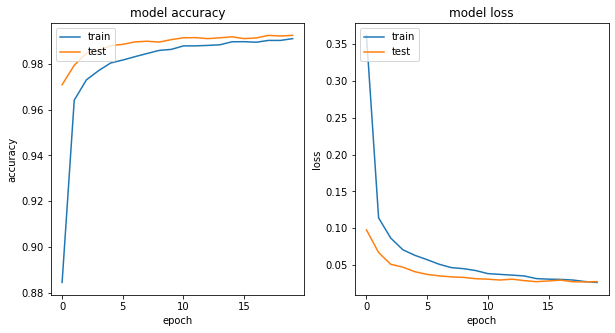

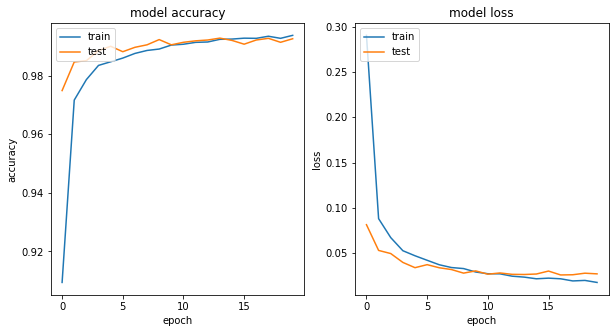

In [19]:
for i, hist in enumerate(histories):
    print(f"CNN {i}: Epochs={n_epochs}, Train accuracy={hist.history['accuracy'][-1]:.5f}, Validation accuracy={hist.history['val_accuracy'][-1]:.5f}")
    plot_model_results(hist)

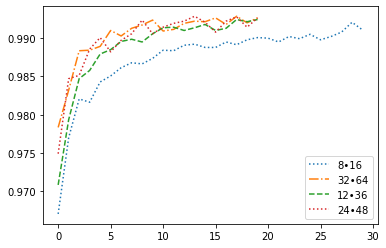

In [24]:
linestyles = [':','-.','--',':',':','-.','--','-',':','-.','--','-']

for i, hist in enumerate(histories):
    plt.plot(hist.history['val_accuracy'], linestyle=linestyles[i])

plt.legend(['8•16',  '32•64','12•36', '24•48' ], loc='best')